# Fibonacci vs high low

## Import Library

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

## Load Price Data

In [5]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    raw_data = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    raw_data = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)
raw_data.tail(10)
ticker_data = raw_data[["Open", "Close", "Low", "High", "Volume"]]
ticker_data.columns = ["open", "close", "low", "high", "volume"]
ticker_data

,open,close,low,high,volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.1,942.9,943.6,1812
2018-08-13 09:05:00,943.1,943.3,942.9,943.5,1323
2018-08-13 09:10:00,943.2,943.1,942.6,943.3,1207
2018-08-13 09:15:00,943.1,942.6,942.3,943.1,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2024-10-25 09:20:00,1338.4,1337.7,1337.4,1338.6,4128
2024-10-25 09:25:00,1337.7,1337.7,1337.0,1338.0,2796
2024-10-25 09:30:00,1337.7,1336.2,1335.5,1338.0,4931


In [9]:
def cal_first_close(tick):
  if not tick.empty:
    return tick[0]

def cal_close(tick):
  tick = tick[100*tick.index.hour+tick.index.minute == 1425]
  if not tick.empty:
    return tick[0]

price = ticker_data
price['first_close'] = price.close
price = price.resample("D").agg({
    'first_close': cal_first_close,
    'high':'max',
    'low': 'min',
    'close': cal_close
    })
raw = price.dropna()

In [10]:
price = raw.copy()
price.tail(10)

,first_close,high,low,close
Date,,,,
2024-10-11,1367.4,1368.0,1358.5,1365.2
2024-10-14,1375.1,1376.8,1358.6,1361.0
2024-10-15,1362.0,1369.6,1354.5,1358.4
2024-10-16,1353.2,1359.4,1352.2,1356.8
2024-10-17,1358.8,1361.5,1347.4,1358.5
2024-10-18,1376.3,1377.9,1363.8,1368.2
2024-10-21,1364.3,1369.9,1362.5,1363.9
2024-10-22,1359.8,1363.3,1350.0,1353.4
2024-10-23,1352.6,1355.4,1345.1,1353.2


In [11]:
price['price'] = price['low'] + 0.236 * (price['high'] - price['low'])
price['price'] = price['price'].shift(1)

In [12]:
price['percent'] = 100 * (price.price - price.close.shift(1)) / price.close.shift(1)
price['returns'] = (price.price - price.first_close) / (price.high - price.low)
price['return'] = 1000 * (price.close - price.price) / price.price
price.tail(10)

,first_close,high,low,close,price,percent,returns,return
Date,,,,,,,,
2024-10-11,1367.4,1368.0,1358.5,1365.2,1364.9960,-0.066183,-0.253053,0.149451
2024-10-14,1375.1,1376.8,1358.6,1361.0,1360.7420,-0.326546,-0.788901,0.189602
2024-10-15,1362.0,1369.6,1354.5,1358.4,1362.8952,0.139251,0.059285,-3.298273
2024-10-16,1353.2,1359.4,1352.2,1356.8,1358.0636,-0.024764,0.675500,-0.930442
2024-10-17,1358.8,1361.5,1347.4,1358.5,1353.8992,-0.213797,-0.347574,3.398185
2024-10-18,1376.3,1377.9,1363.8,1368.2,1350.7276,-0.572131,-1.813645,12.935547
2024-10-21,1364.3,1369.9,1362.5,1363.9,1367.1276,-0.078380,0.382108,-2.360862
2024-10-22,1359.8,1363.3,1350.0,1353.4,1364.2464,0.025398,0.334316,-7.950470
2024-10-23,1352.6,1355.4,1345.1,1353.2,1353.1388,-0.019300,0.052311,0.045228


In [13]:
price = price[price['return'] > -30]
price = price[price['return'] <  30]

In [14]:
pd.qcut(price.percent, 30)

Date
2018-08-14       (-1.07, -0.915]
2018-08-15       (-0.654, -0.59]
2018-08-16     (-0.109, -0.0823]
2018-08-17      (-0.725, -0.654]
2018-08-20      (0.00554, 0.037]
                     ...        
2024-10-18       (-0.59, -0.531]
2024-10-21    (-0.0823, -0.0533]
2024-10-22      (0.00554, 0.037]
2024-10-23    (-0.0246, 0.00554]
2024-10-24       (-0.468, -0.41]
Name: percent, Length: 1436, dtype: category
Categories (30, interval[float64, right]): [(-5.212000000000001, -1.675] < (-1.675, -1.291] < (-1.291, -1.07] < (-1.07, -0.915] ... (0.114, 0.165] < (0.165, 0.244] < (0.244, 0.376] < (0.376, 1.471]]

In [15]:
price['percent_group'] = pd.qcut(price.percent, 30)
price['returns_group'] = pd.qcut(price.returns, 30)
price[['percent_group', 'returns_group']]

,percent_group,returns_group
Date,,
2018-08-14,"(-1.07, -0.915]","(-1.025, -0.918]"
2018-08-15,"(-0.654, -0.59]","(-0.301, -0.242]"
2018-08-16,"(-0.109, -0.0823]","(0.636, 4.052]"
2018-08-17,"(-0.725, -0.654]","(-1.783, -1.509]"
2018-08-20,"(0.00554, 0.037]","(0.12, 0.186]"
...,...,...
2024-10-18,"(-0.59, -0.531]","(-3.949, -1.783]"
2024-10-21,"(-0.0823, -0.0533]","(0.332, 0.446]"
2024-10-22,"(0.00554, 0.037]","(0.332, 0.446]"


## Analysis

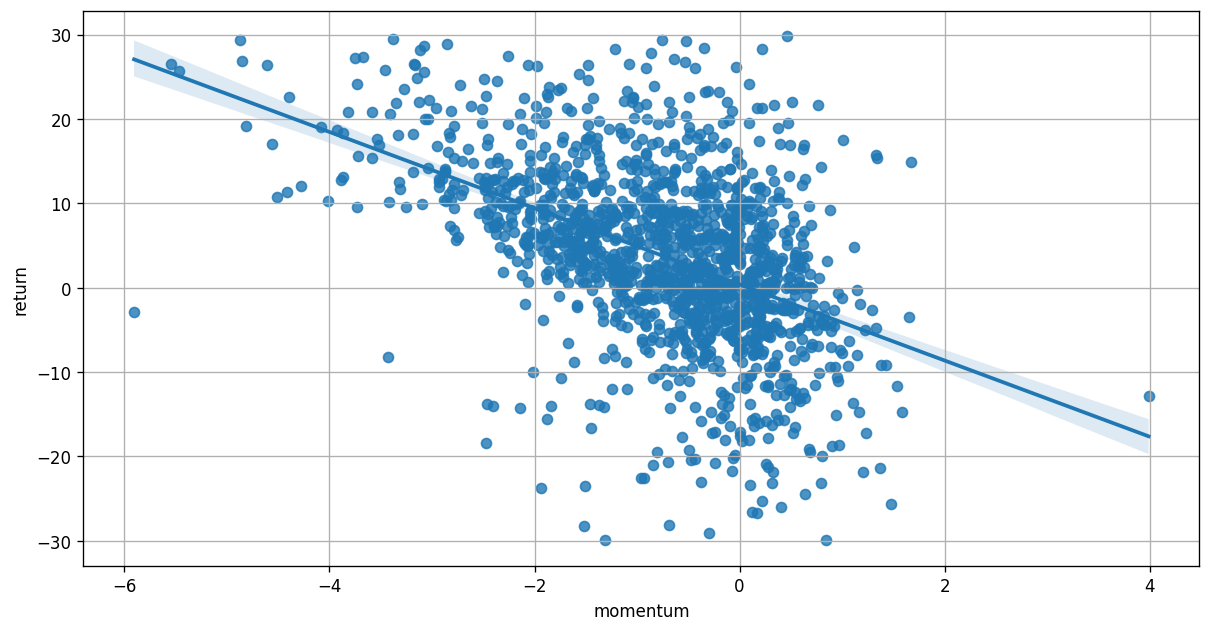

In [16]:
price['momentum'] = price.percent + price.returns
sns.regplot(x=price['momentum'], y=price['return'])
plt.grid(True)

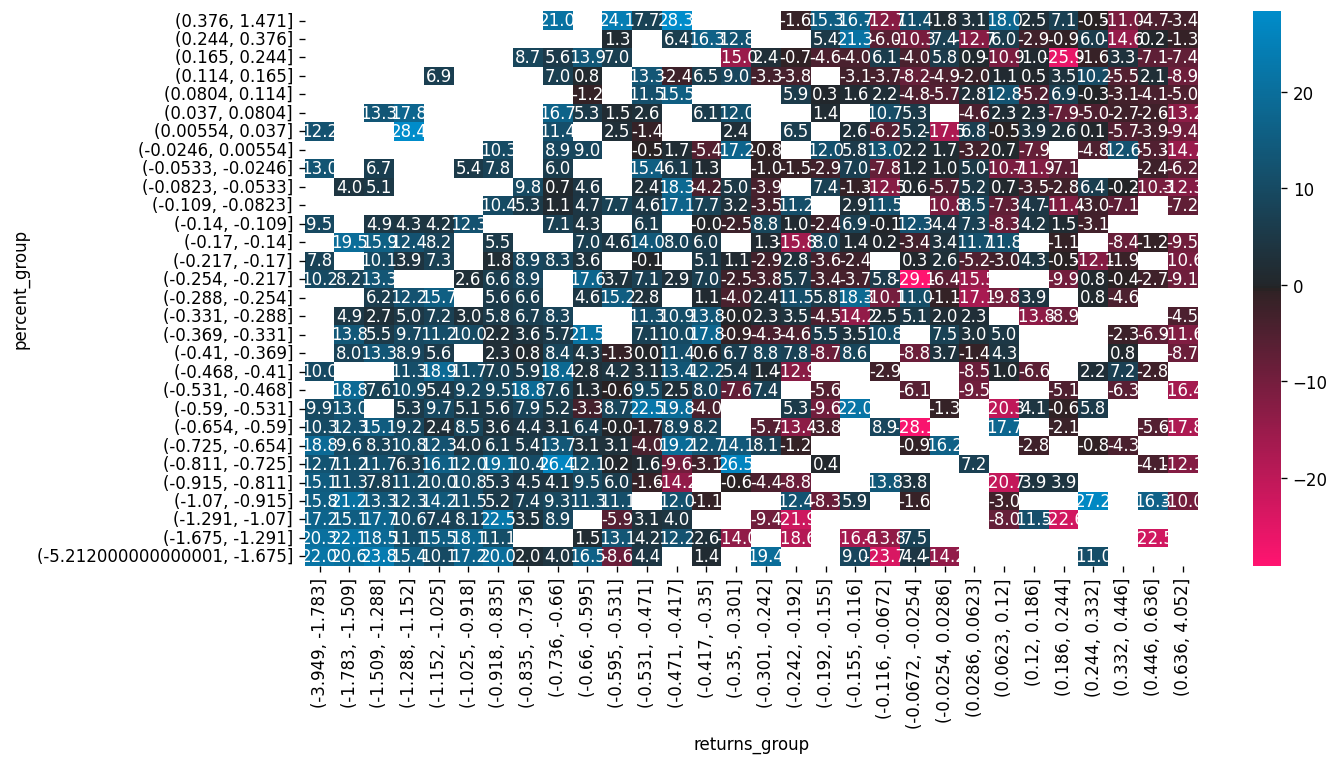

In [17]:
grpd = price.groupby(['percent_group', 'returns_group'])[['return']]
irs = grpd.mean().reset_index()
sns.heatmap(
    irs.pivot(index='percent_group', columns='returns_group', values='return').sort_index(ascending=False),
    cmap=sns.diverging_palette(0, 240, s=100, l=55, center="dark", as_cmap=True),
    annot=True, fmt=".1f");

## Long

In [ ]:
Long = price[price.percent > .26]
Long = Long[Long.returns > .39]
Long

In [ ]:
Long['tail'] = (Long.high - Long.price) / (Long.high - Long.first_close)
Long['tail_group'] = pd.qcut(Long['tail'], 15, duplicates='drop')
Long[['return', 'tail_group']].groupby(['tail_group']).mean()
Long

In [ ]:
Long['return'].sum()

In [ ]:
this_month = Long[(Long.index > '2024-06-01 00:00:00') & (Long.index < '2024-06-30 15:00:00')]
this_month['return'].sum()

In [ ]:
sns.regplot(x=Long['tail'], y=Long['return'])
plt.grid(True)

## Short

In [ ]:
Short = price[price.percent < -.18]
Short = Short[Short.returns < -.39]

In [ ]:
Short['tail'] = (Short.price - Short.low) / (Short.high - Short.low)
Short['tail_group'] = pd.qcut(Short['tail'], 10)
(-Short[['return', 'tail_group']].groupby(['tail_group']).mean()).plot.bar()
plt.grid(True)

In [ ]:
Short

In [ ]:
abs(Short['return'].sum())

In [ ]:
short_this_month = Short[(Short.index > '2024-06-01 00:00:00') & (Short.index < '2024-06-30 15:00:00')]
short_this_month['return'].sum()

In [ ]:
sns.regplot(x=Short['tail'], y=Short['return'])
plt.grid(True)